In [1]:
from sklearn import datasets
iris = datasets.load_iris()

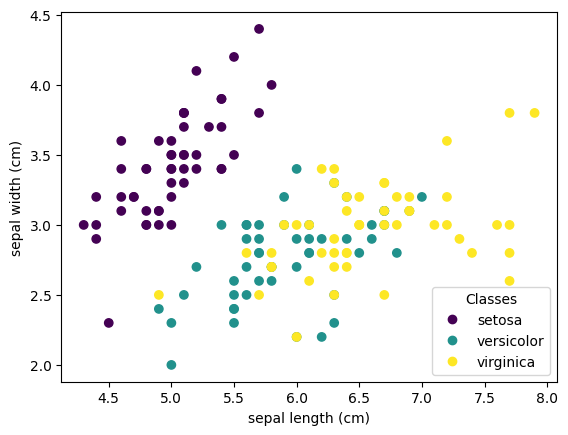

In [2]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

#### Each point in the scatter plot refers to one of the 150 iris flowers in the dataset, with the color indicating their respective type (Setosa, Versicolour, and Virginica). You can already see a pattern regarding the Setosa type, which is easily identifiable based on its short and wide sepal. Only considering these 2 dimensions, sepal width and length, there’s still overlap between the Versicolor and Virginica types

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                       columns= iris['feature_names'] + ['target'])

In [5]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
print("Shape of the data frame: ",iris_df.shape)
print("Total null values: ",iris_df.isna().sum().sum())
print("Duplicate values: ",iris_df.duplicated().sum() )

Shape of the data frame:  (150, 5)
Total null values:  0
Duplicate values:  1


In [7]:
iris_df.drop_duplicates(inplace=True)
print("Shape of the data frame: ",iris_df.shape)
print("\n")
print("Species categories with its count \n",iris_df["target"].value_counts())

Shape of the data frame:  (149, 5)


Species categories with its count 
 target
0.0    50
1.0    50
2.0    49
Name: count, dtype: int64


<Axes: >

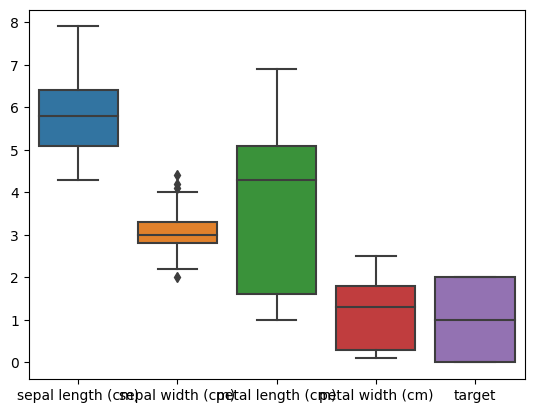

In [8]:
sns.boxplot(data=iris_df)

#### from the above box plot it's clear

sepal_width has outliers and it's right skewed
petal_length and petal_with are left skewed
sepal_length is symmetrical

In [9]:
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   target             149 non-null    float64
dtypes: float64(5)
memory usage: 7.0 KB
None


In [137]:
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         149.000000        149.000000         149.000000   
mean            5.843624          3.059732           3.748993   
std             0.830851          0.436342           1.767791   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.300000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        149.000000  149.000000  
mean           1.194631    0.993289  
std            0.762622    0.817847  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


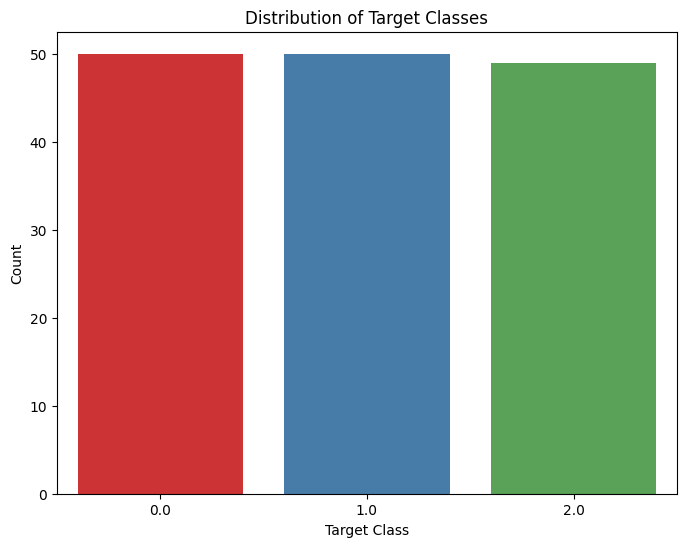

In [10]:
# Visualize the distribution of the target classes
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=iris_df, palette='Set1')
plt.title('Distribution of Target Classes')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

#### All the classes having same distribution no need to balance the data

<Figure size 1000x800 with 0 Axes>

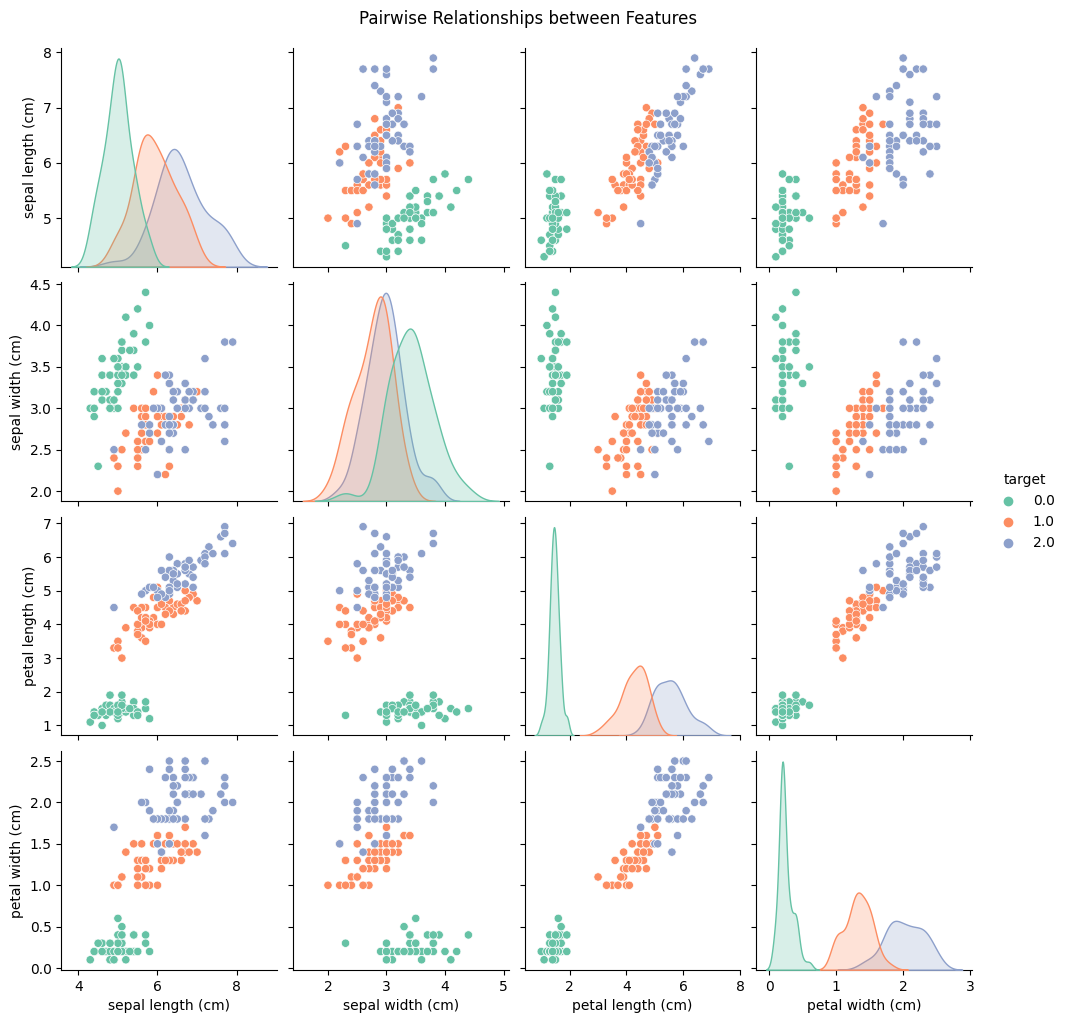

In [11]:
# Visualize the pairwise relationships between features
plt.figure(figsize=(10, 8))
sns.pairplot(iris_df, hue='target', palette='Set2')
plt.suptitle('Pairwise Relationships between Features', y=1.02)
plt.show()

The pairplot visualizes pairwise relationships between features, colored by the target class.
#### Insights:
Clear separation between different species of iris based on petal length and petal width.
Some overlap between versicolor and virginica species, especially in sepal length and width.

In [12]:
skewness_value=iris_df.skew(axis=0)
print("Measure of skewness column wise:\n",skewness_value)  

Measure of skewness column wise:
 sepal length (cm)    0.312826
sepal width (cm)     0.307149
petal length (cm)   -0.263101
petal width (cm)    -0.090076
target               0.012434
dtype: float64


In [13]:
print(iris_df["target"].value_counts())

target
0.0    50
1.0    50
2.0    49
Name: count, dtype: int64


In [14]:
# Convert the target column from floats to integers
iris_df['target'] = iris_df['target'].astype(int)

In [15]:
print(iris_df["target"].value_counts())

target
0    50
1    50
2    49
Name: count, dtype: int64


In [16]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


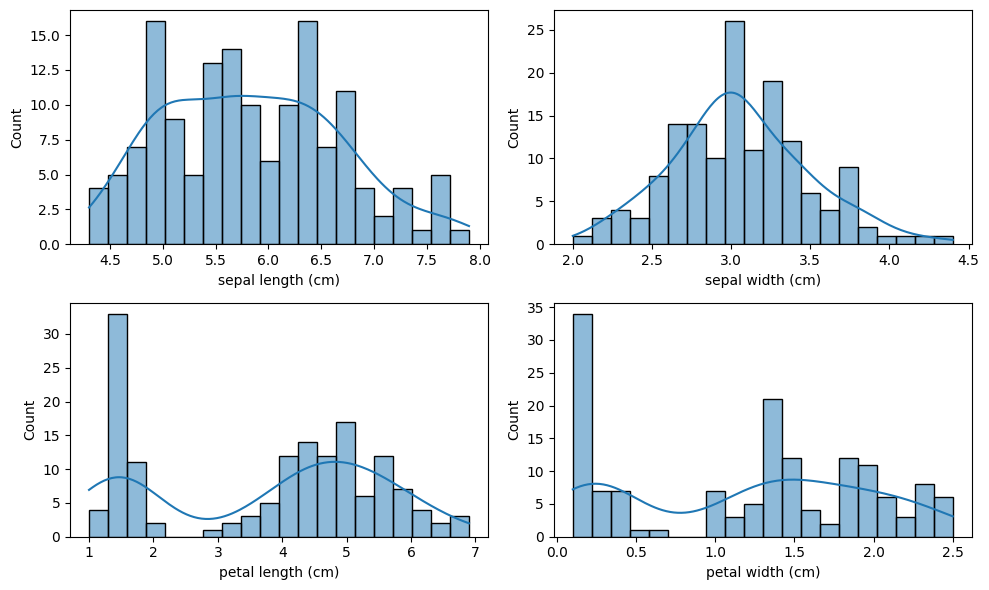

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris_data = load_iris()

# Convert the data into a DataFrame
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# Plot histograms for each feature
plt.figure(figsize=(10, 6))
for i, feature in enumerate(iris_data.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=iris_df, x=feature, kde=True, bins=20)

plt.tight_layout()
plt.show()

### Insights: 
Sepal length and sepal width both appear to be approximately normally distributed, with slight variations.Petal length and petal width show distinct clusters, suggesting potential separability between different species of iris based on these features.

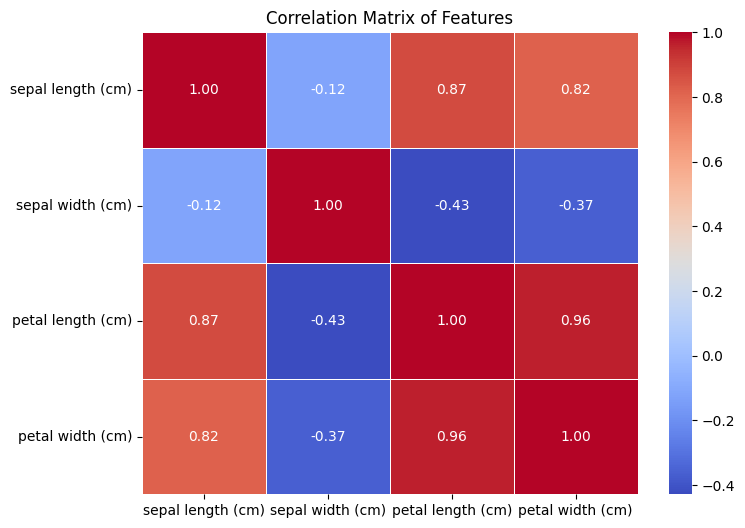

In [22]:
plt.figure(figsize=(8, 6))
correlation_matrix = iris_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

The correlation matrix provides insights into the linear relationships between different features.
#### Insights:
Strong positive correlation between petal length and petal width, indicating that as one feature increases, the other tends to increase as well.
Moderate positive correlation between petal length and sepal length, and between petal width and sepal length.
Weak positive correlation between sepal width and other features.
These correlations help us understand how features relate to each other and can guide feature selection in modeling.

In [24]:
# Load the Iris dataset
iris_data = load_iris()

# Convert the data into a DataFrame
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# Define labels: virginica (1) and non-virginica (0)
iris_df['target'] = (iris_data.target == 2).astype(int)

In [25]:
# Split the data into features (X) and target (y)
X = iris_df.drop('target', axis=1)
y = iris_df['target']

In [27]:
from sklearn.model_selection import train_test_split

# Split the data into train (120 records) - validation (15 records) - test (15 records)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

In [28]:
# Run logistic regression models with 1 to 4 features
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
results = []

for i in range(1, 5):
    features = X_train.columns[:i]
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train[features], y_train)
    y_pred = model.predict(X_val[features])
    accuracy = accuracy_score(y_val, y_pred)
    results.append((i, features, accuracy))

In [29]:
# Display results
print("Results:")
for i, features, accuracy in results:
    print(f"Features: {', '.join(features)}, Accuracy: {accuracy:.4f}")

Results:
Features: sepal length (cm), Accuracy: 0.8667
Features: sepal length (cm), sepal width (cm), Accuracy: 0.9333
Features: sepal length (cm), sepal width (cm), petal length (cm), Accuracy: 1.0000
Features: sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), Accuracy: 1.0000


In [30]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
4,5.0,3.6,1.4,0.2
32,5.2,4.1,1.5,0.1
142,5.8,2.7,5.1,1.9
85,6.0,3.4,4.5,1.6
86,6.7,3.1,4.7,1.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


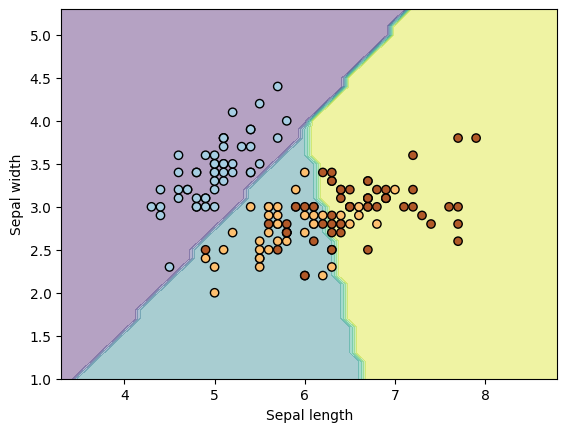

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features
y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data
logreg = LogisticRegression(C=1e5)
logreg.fit(X, y)

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are already defined
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

#### Failure Mode: 
Index 11, 22, 36, 31, 18, 27: These data points have relatively low values for all features, which might be close to the boundary between classes. It's possible that these samples belong to a class that is not well-separated from the others.

Index 110, 101, 128, 145: These samples have higher values, particularly for petal length and width, which might belong to a different class or have features that overlap with another class in the dataset.

Index 131: This sample has very high values for all features, indicating that it might be an outlier or an unusual data point that is difficult to classify.

In [162]:
#### How we can improve model:
# Experimenting with different algorithms or fine-tuning the hyperparameters of the existing classifiers to find the best model for your dataset.
# Exploring ensemble methods that combine multiple classifiers to improve overall performance.
